In [1]:
import os
import numpy as np

from keras.models import load_model
from keras.datasets import cifar10
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

# load model
model = load_model('../input/final_model.h5')
# model.summary()

Using TensorFlow backend.


In [2]:
# Experiment Setup

image_index = 1446
obstruction_size = (4, 4, 3)
stride = 1

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X = np.vstack((X_train, X_test))
y = np.vstack((y_train, y_test))

# cache image index
cached_image = X[image_index, :, :, :]

# one hot encode target values
y = to_categorical(y)

# convert from integers to floats
X = X.astype('float32')

# normalize to range 0-1
X = X/ 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
heat_map = np.zeros((np.ceil(X.shape[1]-obstruction_size[0]/stride).astype(np.int), np.ceil(X.shape[2]-obstruction_size[1]/stride).astype(np.int)))

for i in range(0, X.shape[1]-obstruction_size[0], stride):
    for j in range(0, X.shape[2]-obstruction_size[1], stride):
        image = X[image_index, :, :, :].copy()
        image[i:i+obstruction_size[0], j:j+obstruction_size[1], :] = 0
        prediction = model.predict(image.reshape(1, X.shape[1], X.shape[2], X.shape[3]))
        heat_map[i,j] = 1 - prediction[0][np.argmax(y[image_index])]

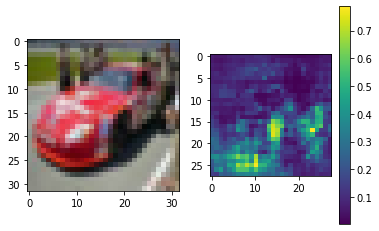

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cached_image)
img = ax2.imshow(heat_map)
ax2.figure.colorbar(img)